# SLU02 - Subsetting data in pandas: Exercise notebook

In this notebook you'll practice the concepts you've learned in the learning and examples notebooks:

    - Setting pandas Dataframe index
    - Selecting columns with brackets notation
    - Selecting columns with dot notation
    - Selecting rows with loc 
    - Selecting rows with iloc
    - Multi-axis indexing
    - Masks
    - Subsetting on conditions
    - Removing and adding columns

In each exercise, you'll be asked to implement a function.

Let's dive right in.

In [1]:
# Imports needed
import pandas as pd
import numpy as np
import math
import hashlib
import json
from utils import draw_base_puzzle, draw_final_puzzle

#from IPython.core.display import HTML

As you can seee, it's a pretty simple one. You will be given 10 clues to fill each of the columns and extract the horizontal words in blue. 

## Kaggle Competition

As an aspiring data scientist you are eager to apply your new skills and you decide to participate in a Kaggle competition. However, this competition has a twist: you must prove to have the minimum skills to enter it by completing a first data science based challenge. Easy, right?

<img src="media/kaggle_in_kaggle.png" alt="kaggle_in_kaggle" width="40%"/>

So you dive right into it. The assignment is the following: you must successfully complete a crossword puzzle where a set of hints requires you to extract information from the provided dataset. After completing all the words, you'll see the secret keyphrase (marked in blue) that will unlock the competition for you.

Load the puzzle below.

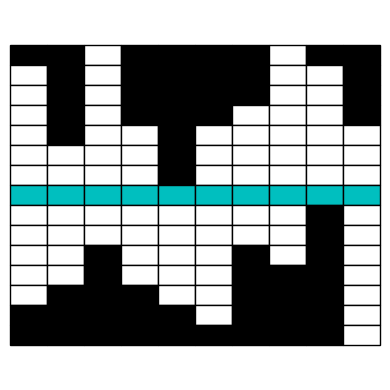

In [2]:
draw_base_puzzle()

But before that, start by loading the dataset from which you will extract the clues for the puzzle. It's the San Francisco Plant Finder dataset containing plant species suitable for planting in the SF area.

In [3]:
df = pd.read_csv('data/San_Francisco_Plant_Finder_Data.csv').convert_dtypes()
df.head()

,Latin_Name,Common_Name,Family_Name,Plant_Type,Bloom_Time,Flower_Color,Size_at_Maturity,Climate_Appropriate_Plants,Plant_Communities,Suitable_Site_Conditions,Soil_Type,Pruning_Needs,Water_Needs,Habitat_Value,Associated_Wildlife,Stormwater_Benefit,Stormwater_int,Appropriate_Location,Additional_Characteristices_Notes
0,Acacia baileyana 'Purpurea',Purple-leaf Acacia,Fabaceae,Tree (evergreen),Spring,Yellow,8.0,Exotic,<NA>,Sun,<NA>,<NA>,Low,<NA>,Birds;Butterflies,No,0,Sidewalk,"Fast grower, high maintenance."
1,Acer buergeranum,Trident Maple,Sapindaceae Aceraceae,Tree (deciduous),Spring,<NA>,6.0,Exotic,<NA>,"Sun,Part shade",<NA>,<NA>,Low,<NA>,<NA>,No,0,Sidewalk,"Prefers heat, wind protection."
2,Acer macrophyllum,Bigleaf Maple,Sapindaceae,Tree (deciduous),Spring,"Orange,Red,Yellow",8.0,CA Native,Riparian,"Sun,Shade","Clay,Loam,Sand,Rock",<NA>,Moderate,"Nesting,Pollinator",Bees;Birds;Butterflies,Yes,1,Garden,Provides shelter for wildlife
3,Acer negundo,Box Elder,Sapindaceae,Tree (deciduous),Spring,Pink,8.0,SF Native,"Chaparral,Grassland/prairie,Riparian,Woodland","Sun,Shade","Clay,Loam,Sand,Rock",<NA>,Moderate,"Buds/greens,Nesting",Bees;Birds;Butterflies;Insects,No,0,Garden,Withstands wind.
4,Acer rubrum,Red Maple,Sapindaceae,Tree (deciduous),Spring,Red,8.0,Exotic,<NA>,"Sun,Part shade","Clay,Loam,Sand",<NA>,Moderate,<NA>,<NA>,Yes,1,Sidewalk,"Prefers heat, wind protection"


Note that you should use this original dataset as input in every exercise.

Now let's dive into the clues! 

### Clue 1 - First value in `Common_Name` when sorting the dataset by this column 

The first clue asks for the first value of the column `Common_Name` after we sort 
the dataframe by this column (using its natural order). 

To solve this, implement a function to change the index and sort it.

**Hint**: Keep in mind that we don't want to discard the original index (which automatically got the name `index`) as it may be useful in the long run.

In [4]:
def change_and_sort_index(df, column):
    """ 
    Change dataframe index to the desired column and sort the index, avoiding 
     repeated columns.
    
    Args:
        df (pd.DataFrame): the input DataFrame
        column: column name to use as index

    Returns:p
        (pd.DataFrame): resulting Dataframe

    """
    
    ### BEGIN SOLUTION 
    new_df = df.reset_index(drop=False)
    new_df = new_df.set_index(column, drop=True)
    new_df = new_df.sort_index()
    return new_df
    ### END SOLUTION    

In [5]:
plant_dataset = pd.read_csv('data/San_Francisco_Plant_Finder_Data.csv').convert_dtypes()
new_dataset = change_and_sort_index(plant_dataset, "Family_Name")

assert isinstance(new_dataset, pd.DataFrame), 'The function should return a dataframe.'
assert new_dataset.shape == plant_dataset.shape, 'The shape of the resulting dataset is not correct.'
assert new_dataset.index.name == "Family_Name", 'The index column is not set correctly.'
assert hashlib.sha256(json.dumps(list(new_dataset.Latin_Name.array)).encode()).hexdigest() == \
'e954fec17ff2ced4efb4965300675c153f586cbed9bbf58fec4edf09e34eae92', 'The dataset is not sorted correctly.'
assert 'index' in list(new_dataset.columns), 'Did you remove the old index?'
print('Well done!')

Well done!


You can now use the function you built to get the first clue.

In [6]:
clue_dataset = change_and_sort_index(plant_dataset, "Common_Name")

first_sorted_employer_industry = clue_dataset.index[0]

FIRST_CLUE = first_sorted_employer_industry

### Clue 2 - Top family name for plants blooming in spring

You now want to find the most common `Family_Name` for the subset of our data where the `Bloom_Time` equals `Spring`. To do this, you decide to reuse your previous function to change the index and create an extra function to select rows by index values.

Implement this second function below.

In [7]:
def select_rows_from_index(df, ids):
    """ 
    Select the desired rows given the index value
    
    Args:
        df (pd.DataFrame): the input DataFrame
        ids: list with the desired values to retrieve

    Returns:
        (pd.DataFrame): subsetted Dataframe

    """    
    
    ### BEGIN SOLUTION 
    return df.loc[ids]
    ### END SOLUTION

In [8]:
plant_dataset = pd.read_csv('data/San_Francisco_Plant_Finder_Data.csv').convert_dtypes()
indexed_dataset = change_and_sort_index(plant_dataset, "Bloom_Time")
desired_bloom_time = ['Winter', 'Summer,Fall']
filtered_dataset = select_rows_from_index(indexed_dataset, desired_bloom_time)

assert isinstance(filtered_dataset, pd.DataFrame), 'The function should return a dataframe.'
assert filtered_dataset.shape == (69,19), 'The shape of the resulting dataset is not correct.'
assert list(filtered_dataset.index.unique()) == desired_bloom_time, 'The bloom time is not correct.'
assert hashlib.sha256(json.dumps(list(filtered_dataset.Latin_Name.array)).encode()).hexdigest() == \
'864a94326e43052581989f3233bda89307f11caf85407a9563dc99adc2c8cf05', 'The dataset is not sorted correctly.'
print('Well done!')

Well done!


Combining the two you now get the second clue.

In [9]:
indexed_dataset = change_and_sort_index(plant_dataset, "Bloom_Time")
clue_dataset = select_rows_from_index(indexed_dataset, ['Spring'])

# When using `value_counts` the index becomes the column values and the counts are ordered from highest to lowest
top_family_name = clue_dataset.Family_Name.value_counts().index[0] 

SECOND_CLUE = top_family_name

### Clue 3 - The top habitat value in the rows 300 to 450

The next clue asks for a specific example range. For this purpose, build a function that takes as arguments two indices - `start` and `end` - and retrieves the slice of rows from `start` to `end`. Implement it below.

In [10]:
def get_slice(df, start, end):
    """ 
    Get a range of rows from the provided dataset 
    
    Args:
        df (pd.DataFrame): the input DataFrame
        start: start position for the range
        end: end position for the range

    Returns:
        (pd.DataFrame): subsetted Dataframe

    """
    
    ### BEGIN SOLUTION 
    return df.iloc[start:end]
    ### END SOLUTION    

In [11]:
plant_dataset = pd.read_csv('data/San_Francisco_Plant_Finder_Data.csv').convert_dtypes()

top_rows_1 = get_slice(plant_dataset, 123, 457)

assert top_rows_1.shape[0] == 334, 'The slice size is not correct.'
assert top_rows_1.shape[1] == plant_dataset.shape[1], 'The slice size is not correct.'
assert top_rows_1.Latin_Name.array[0] == 'Erysimum franciscanum', 'The content of the slice is not correct.'

top_rows_2 = get_slice(plant_dataset, 315, 713)

assert top_rows_2.shape[0] == 398, 'The slice size is not correct.'
assert top_rows_2.shape[1] == plant_dataset.shape[1], 'The slice size is not correct.'
assert top_rows_2.Latin_Name.array[0] == 'Ribes menziesii', 'The content of the slice is not correct.'
print('Well done!')

Well done!


Use the function to get the third clue:

In [12]:
clue_dataset = get_slice(plant_dataset, 300, 450)

# When using `value_counts` the index becomes the column values and the counts are ordered from highest to lowest
common_habitat_value = clue_dataset.Habitat_Value.value_counts().index[0] 

THIRD_CLUE = common_habitat_value

### Clue 4 - The plant communities type of example 4

To solve this clue, create a function that allows you to index both the rows and the columns of a dataframe. Implement it below.

In [13]:
def dedicated_subset(df, rows, columns):
    """ 
    Select columns and rows from dataframe.
    
    Args:
        df (pd.DataFrame): the input DataFrame
        rows: list of rows to fetch
        columns: list of columns to fetch

    Returns:
        (pd.DataFrame): subsetted df

    """
    
    ### BEGIN SOLUTION 
    return df.loc[rows, columns]
    ### END SOLUTION

In [14]:
plant_dataset = pd.read_csv('data/San_Francisco_Plant_Finder_Data.csv').convert_dtypes()

plant_subset_single = dedicated_subset(plant_dataset, [412], ['Climate_Appropriate_Plants'])
assert plant_subset_single.shape == (1,1), 'The subset size is not correct.'
assert plant_subset_single.Climate_Appropriate_Plants.array[0] == 'CA Native', 'The contents of the subset it not correct.'

plant_subset_multiple = dedicated_subset(plant_dataset, [11, 111], ['Suitable_Site_Conditions','Soil_Type','Water_Needs'])
assert plant_subset_multiple.shape == (2,3), 'The subset size is not correct.'
assert plant_subset_multiple.Soil_Type.array[0] == 'Loam,Sand', 'The contents of the subset it not correct.'
print('Well done!')

Well done!


Use the function to get the fourth clue:

In [15]:
clue_dataset = dedicated_subset(plant_dataset, [2], ["Plant_Communities"])
clue_dataset.values[0][0]

FOURTH_CLUE = clue_dataset.values[0][0]

Now that you have found a couple of clues, let's check how the board looks. You should be able to see something shapin up.


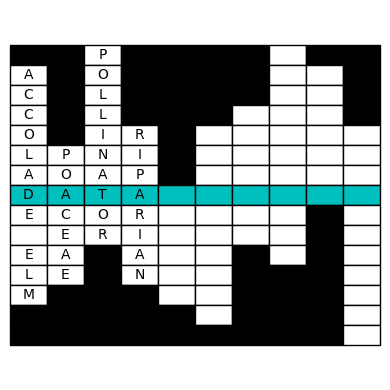

In [16]:
draw_final_puzzle([FIRST_CLUE, SECOND_CLUE, THIRD_CLUE, FOURTH_CLUE, "", "", "", "", "", ""])


Uhh exciting. Dive into the next clues to fill out the rest of the puzzle!

<img src="media/excited.gif" alt="excited" width="40%"/>

## Clues 5 - 8

These next clues ask for more complex datasets.

We will call these subset A and B. 

In particular, the clues define dataset A as follows:

* Plants with low water needs ('Low')
* Plant size between 0.4 and 5
* They are not exotic
* They are fern, succulent, vine, or grass
* They grow well in sun and part shade ('Sun','Sun,Part shade')
* Contains columns 'Common_Name','Bloom_Time','Flower_Color','Soil_Type'

Implement a function that obtains this dataset.

**Hint**: Look into the function `.isin` described in the learning notebook and how it can be used to check a value against a list.

In [17]:
def plant_dataset_A(df):
    """ 
    Show plants that fit the following parameters:
    
      - Plants with low water needs ('Low')
      - Plant size between 0.4 and 5
      - They are not exotic
      - They are fern, succulent, vine, or grass
      - They grow well in sun and part shade ('Sun','Sun,Part shade')
      - Contains columns 'Common_Name','Bloom_Time','Flower_Color','Soil_Type'
      
    Return only the 'Common_Name','Bloom_Time','Flower_Color','Soil_Type'
    
    Args:
        df (pd.DataFrame): the input DataFrame

    Returns:
        (pd.DataFrame): subsetted df

    """

    ### BEGIN SOLUTION 
    result = df[(df.Water_Needs=='Low') &
                (df.Size_at_Maturity>0.5)  &
                (df.Size_at_Maturity<5)  &
                (df.Climate_Appropriate_Plants!='Exotic') &
                (df.Plant_Type.isin(['Fern', 'Succulent', 'Vine', 'Grass'])) &
                (df.Suitable_Site_Conditions.isin(['Sun','Sun,Part shade']))
                ]
    return result[['Common_Name','Bloom_Time','Flower_Color','Soil_Type']]
    ### END SOLUTION

In [18]:
plant_dataset = pd.read_csv('data/San_Francisco_Plant_Finder_Data.csv').convert_dtypes()
plant_subset_A = plant_dataset_A(plant_dataset)

assert isinstance(plant_subset_A, pd.DataFrame), 'The result is not a dataframe.'
assert plant_subset_A.shape == (16,4)
assert plant_subset_A.columns.tolist() == ['Common_Name','Bloom_Time','Flower_Color','Soil_Type']
assert hashlib.sha256(json.dumps(list(plant_subset_A.Common_Name.array)).encode()).hexdigest() == \
'd462d8dfe8060495ce202935532f961156b859d2e07f51dae780c1ee81dcf908', 'Subset A is not correct.'
print('Well done!')

Well done!


Additionally, the clues define dataset B as follows:

* not an annual plant
* taller than 4
* can grow in any soil type
* does not have yellow or white flowers (color is not 'Yellow', 'White')
* Contains columns 'Common_Name','Habitat_Value','Associated_Wildlife'

Implement a function that obtains this dataset.

In [19]:
def plant_dataset_B(df):
    """ 
    Show plants that fit the following parameters:
    
      - not a shrub
      - taller than 4
      - can grow in any soil type
      - does not have yellow or white flowers (color is not 'Yellow', 'White')
      
    Return only the 'Common_Name','Habit_Value','Associated_Wildlife'
    
    Args:
        df (pd.DataFrame): the input DataFrame

    Returns:
        (pd.DataFrame): subsetted df

    """

    ### BEGIN SOLUTION 
    result = df.where(
                (df.Plant_Type!='Annual') &
                (df.Size_at_Maturity>4)  &
               ~(df.Flower_Color.isin(['White', 'Yellow']))
               )
    result = result.dropna(how='all')
    return result[['Common_Name','Habitat_Value','Associated_Wildlife']]
    ### END SOLUTION

In [20]:
plant_dataset = pd.read_csv('data/San_Francisco_Plant_Finder_Data.csv').convert_dtypes()
plant_subset_B = plant_dataset_B(plant_dataset)

assert isinstance(plant_subset_B, pd.DataFrame), 'The result is not a dataframe.'
assert plant_subset_B.shape == (72,3), 'The shape of subset B is not correct.'
assert plant_subset_B.columns.tolist() == ['Common_Name','Habitat_Value','Associated_Wildlife'], 'The columns of subset B are not correct.'

assert hashlib.sha256(json.dumps(list(plant_subset_B.Common_Name.array)).encode()).hexdigest() == \
'8e515c57f760e77db4825b118488f1e09ca6b4558ba5db1ac997020b870a6d50', 'Subset B is not correct.'
print('Well done!')

Well done!


Now look into the clues and retrieve the correct values to fill the puzzle:

* Clue 5 - The bloom time of the 5th element of subset A
* Clue 6 - The flower color of the 1st element of subset A
* Clue 7 - The habitat value of the 41st element of subset B
* Clue 8 - The associated wildlife of the 28th element of subset B

In [21]:
FIFTH_CLUE = plant_subset_A.Bloom_Time.array[4]
SIXTH_CLUE = plant_subset_A.Flower_Color.array[0]
SEVENTH_CLUE = plant_subset_B.Habitat_Value.array[40]
EIGTH_CLUE = plant_subset_B.Associated_Wildlife.values[27]

## Clues 9 - 10

These next clues once again require that you filter your dataset into different subsets.

We will call these subset C and D. In particular:

* dataset C should not contain succulents
* dataset D should contain only grasses

As you probably realize, you could use functions similar to the ones before to retrieve this dataset. However, we want you to use what you have learned regarding hiding data. 

Implement functions that hide the non-desired data but keep the dataframe shape.

In [22]:
def plant_dataset_C(df):
    """ 
    Hide all succulents in the dataframe
    
    Args:
        df (pd.DataFrame): the input DataFrame

    Returns:
        (pd.DataFrame): output DataFrame

    """
    
    ### BEGIN SOLUTION 
    return df.mask(df.Plant_Type == 'Succulent')
    ### END SOLUTION

In [23]:
plant_dataset = pd.read_csv('data/San_Francisco_Plant_Finder_Data.csv').convert_dtypes()
plant_subset_C = plant_dataset_C(plant_dataset)

assert isinstance(plant_subset_C, pd.DataFrame), 'The result should be a dataframe.'
assert plant_subset_C.shape == plant_dataset.shape, 'The shape of the dataframe is not correct.'
assert (plant_subset_C.Plant_Type == 'Succulent').sum() == 0, 'The succulents are still inside.'
print('Well done!')

Well done!


In [24]:
def plant_dataset_D(df):
    """ 
    Show only Data Scientists in dataframe
    
    Args:
        df (pd.DataFrame): the input DataFrame

    Returns:
        (pd.DataFrame): output DataFrame

    """
    
    ### BEGIN SOLUTION 
    return df.where(df.Plant_Type == 'Grass')
    ### END SOLUTION

In [25]:
plant_dataset = pd.read_csv('data/San_Francisco_Plant_Finder_Data.csv').convert_dtypes()
plant_subset_D = plant_dataset_D(plant_dataset)

assert isinstance(plant_subset_D, pd.DataFrame), 'The result should be a dataframe.'
assert plant_subset_D.shape == plant_dataset.shape, 'The shape of the dataframe is not correct.'
assert (plant_subset_D.Plant_Type == 'Grass').sum() == 56, 'The grasses should be in the dataset.'
assert (plant_subset_D.Plant_Type != 'Grass').sum() == 0, 'There are plants that are not grasses inside.'
print('Well done!')

Well done!


Now look into the clues and retrieve the correct values to fill the puzzle:

* Clue 9 - The 99th value in prunning needs in subset D
* Clue 10 - The 32nd value in habitat value in subset C

In [26]:
NINTH_CLUE = plant_subset_D.Pruning_Needs.array[98]
TENTH_CLUE = plant_subset_C.Habitat_Value.array[33] 

Now that you have all the clues, check the puzzle for the secret key

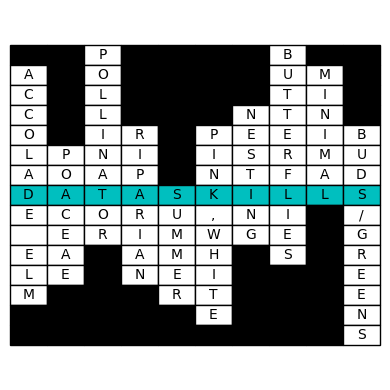

In [27]:
draw_final_puzzle(
    [
        FIRST_CLUE, 
        SECOND_CLUE, 
        THIRD_CLUE, 
        FOURTH_CLUE, 
        FIFTH_CLUE, 
        SIXTH_CLUE, 
        SEVENTH_CLUE, 
        EIGTH_CLUE, 
        NINTH_CLUE, 
        TENTH_CLUE
    ]
)

In [28]:
# Introduce the highlighted words you see, in the following form:
# kaggle_key = "highlightedword"

### BEGIN SOLUTION 
kaggle_key = "dataskills"
### END SOLUTION

In [29]:
assert hashlib.sha256(kaggle_key.lower().encode()).hexdigest() == '910a9c5274ba0637ca5882fdef4190e608fb05e465da46518bd7f2fe2eb6d93d'

Congratulations, you made it! You would now be able to enter the actual challenge and brag to all your friends about how good you are in data science 😄 

<img src="media/excel.jpg" alt="excel" width="40%"/>


